## Mô tả bộ dữ liệu
- **sex**: 1 cho nữ và 2 cho nam.
- **age**: Tuổi của bệnh nhân.
- **classification**: Kết quả xét nghiệm COVID. Giá trị từ 1-3 nghĩa là bệnh nhân được chẩn đoán mắc COVID ở các mức độ khác nhau. 4 hoặc cao hơn nghĩa là bệnh nhân không mắc COVID hoặc kết quả xét nghiệm không xác định.
- **patient type**: Loại chăm sóc mà bệnh nhân nhận được tại đơn vị. 1 là về nhà và 2 là nhập viện.
- **pneumonia**: Bệnh nhân có viêm các túi khí hay không.
- **pregnancy**: Bệnh nhân có đang mang thai hay không.
- **diabetes**: Bệnh nhân có bệnh tiểu đường hay không.
- **copd**: Bệnh nhân có bị bệnh phổi tắc nghẽn mạn tính hay không.
- **asthma**: Bệnh nhân có bị hen suyễn hay không.
- **inmsupr**: Bệnh nhân có bị suy giảm miễn dịch hay không.
- **hypertension**: Bệnh nhân có bị tăng huyết áp hay không.
- **cardiovascular**: Bệnh nhân có bệnh tim hoặc các bệnh liên quan đến mạch máu hay không.
- **renal chronic**: Bệnh nhân có bệnh thận mạn tính hay không.
- **other disease**: Bệnh nhân có bệnh khác hay không.
- **obesity**: Bệnh nhân có bị béo phì hay không.
- **tobacco**: Bệnh nhân có sử dụng thuốc lá hay không.
- **usmr**: Bệnh nhân có được điều trị tại các đơn vị y tế cấp cứu cấp 1, 2 hoặc 3 hay không.
- **medical unit**: Loại cơ sở thuộc Hệ thống Y tế Quốc gia đã cung cấp chăm sóc.
- **intubed**: Bệnh nhân có được kết nối với máy thở hay không.
- **icu**: Bệnh nhân có được nhập vào Đơn vị Chăm sóc Đặc biệt hay không.
- **date died**: Nếu bệnh nhân tử vong, ghi ngày tử vong; nếu không sẽ nhận giá trị 9999-99-99.

## Khám phá dữ liệu

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [73]:
data = pd.read_csv('Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Tiền xử lý dữ liệu

In [75]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [76]:
df = data.copy()

In [77]:
df.duplicated().sum()

812049

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.shape

(236526, 21)

In [80]:
df['DATE_DIED'].value_counts()


DATE_DIED
9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [81]:
df.DATE_DIED[df['DATE_DIED'] != '9999-99-99'] = 1
df.DATE_DIED[df['DATE_DIED'] == '9999-99-99'] = 0
df.DATE_DIED.value_counts()

DATE_DIED
0    160561
1     75965
Name: count, dtype: int64

<Axes: title={'center': 'Count (DATE_DIED)'}, xlabel='DATE_DIED'>

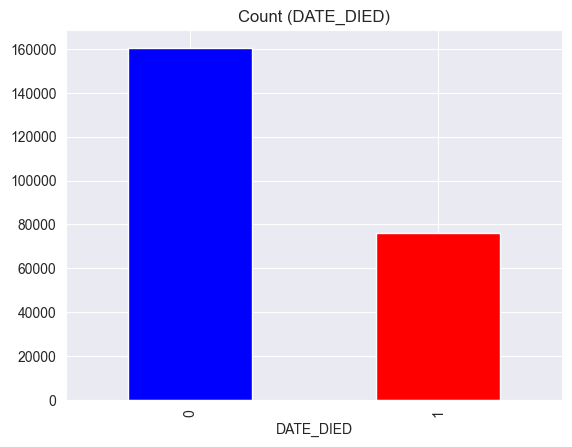

In [82]:
df['DATE_DIED'].value_counts().plot(kind='bar', title='Count (DATE_DIED)', color=['b', 'r'])

Thay feature 'DATE_DIED' bằng feature 'DEATH'

In [83]:
df['DEATH'] = df.DATE_DIED

In [84]:
df.drop(columns=['DATE_DIED'], inplace=True)

In [85]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [86]:
df['SEX'].value_counts()

SEX
2    129503
1    107023
Name: count, dtype: int64

In [87]:
df['SEX'].replace({1:'Female', 2:'Male'}, inplace=True)

In [88]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1             3020
        2           102049
        98            1954
Male    97          129503
Name: count, dtype: int64

In [89]:
df.PREGNANT.replace({97:0, 98:np.nan}, inplace = True)

In [90]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1.0           3020
        2.0         102049
Male    0.0         129503
Name: count, dtype: int64

In [91]:
df['PREGNANT'].isnull().sum()

1954

In [92]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
2    136644
1     99882
Name: count, dtype: int64

Thay đổi 2 về 0. 1 là có, 0 là không có 

In [93]:
df['USMER'].replace(2.0, 0, inplace=True)
df['SEX'].replace(2.0, 0, inplace=True)
df['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
df['INTUBED'].replace(2.0, 0, inplace=True)
df['PNEUMONIA'].replace(2.0, 0, inplace=True)
df['PREGNANT'].replace(2.0, 0, inplace=True)
df['DIABETES'].replace(2.0, 0, inplace=True)
df['COPD'].replace(2.0, 0, inplace=True)
df['ASTHMA'].replace(2.0, 0, inplace=True)
df['INMSUPR'].replace(2.0, 0, inplace=True)
df['HIPERTENSION'].replace(2.0, 0, inplace=True)
df['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
df['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
df['OBESITY'].replace(2.0, 0, inplace=True)
df['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
df['TOBACCO'].replace(2.0, 0, inplace=True)
df['ICU'].replace(2.0, 0, inplace=True)

Đổi giá trị của feature PATIENT_TYPE. 1 là hospitalized, 0 là not hospitalized

In [94]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
0    136644
1     99882
Name: count, dtype: int64

In [95]:
df.PATIENT_TYPE.replace({1:'hospitaliezed', 0:'not hospitalized'}, inplace=True)

In [96]:
df['CLASIFFICATION_FINAL'].replace([1,2,3,4,5,6,7],
                                   ['patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.'],inplace=True)

In [97]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
the patient is not a carrier of covid or that the test is inconclusive.    123238
patient was diagnosed with covid in different degrees.                     113288
Name: count, dtype: int64

In [98]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
not hospitalized    136644
hospitaliezed        99882
Name: count, dtype: int64

Các giá trị 97, 98, 99 chuyển thành null

In [99]:
df['TOBACCO'].value_counts()

TOBACCO
0     201163
1      32625
98      2738
Name: count, dtype: int64

In [100]:
df.replace([97,98,99], np.nan, inplace=True)

Missing value

In [101]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 105387
PNEUMONIA                 7187
AGE                        308
PREGNANT                  1954
DIABETES                  2840
COPD                      2529
ASTHMA                    2506
INMSUPR                   2926
HIPERTENSION              2620
OTHER_DISEASE             4362
CARDIOVASCULAR            2603
OBESITY                   2554
RENAL_CHRONIC             2531
TOBACCO                   2738
CLASIFFICATION_FINAL         0
ICU                     105536
DEATH                        0
dtype: int64

Loại bỏ những feature có số lượng giá trị null lớn

In [102]:
df.drop(columns=["INTUBED", "ICU"], inplace=True)

Tiếp tục loại bỏ những dữ liệu null

In [103]:
df.dropna(inplace=True)

In [104]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

## Encoding những dữ liệu dạng Object

In [105]:
df.describe(include=object)

,SEX,PATIENT_TYPE,CLASIFFICATION_FINAL
count,220852,220852,220852
unique,2,2,2
top,Male,not hospitalized,the patient is not a carrier of covid or that ...
freq,122330,129810,111036


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [107]:
cols = ['SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [108]:
x=df.drop('DEATH',axis=1)
y=df['DEATH']

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220852 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 220852 non-null  int64  
 1   MEDICAL_UNIT          220852 non-null  int64  
 2   SEX                   220852 non-null  int32  
 3   PATIENT_TYPE          220852 non-null  int32  
 4   PNEUMONIA             220852 non-null  float64
 5   AGE                   220852 non-null  float64
 6   PREGNANT              220852 non-null  float64
 7   DIABETES              220852 non-null  float64
 8   COPD                  220852 non-null  float64
 9   ASTHMA                220852 non-null  float64
 10  INMSUPR               220852 non-null  float64
 11  HIPERTENSION          220852 non-null  float64
 12  OTHER_DISEASE         220852 non-null  float64
 13  CARDIOVASCULAR        220852 non-null  float64
 14  OBESITY               220852 non-null  float64
 15  RENA

In [110]:
df.duplicated().sum()

67296

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df['DEATH'].value_counts()

DEATH
0    116614
1     36942
Name: count, dtype: int64

In [113]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
count,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000,153556.000000
mean,0.451536,7.505093,0.526792,0.531233,0.397008,52.786540,0.015258,0.345828,0.083097,0.087597,0.072677,0.416330,0.110084,0.106000,0.310831,0.098993,0.173513,0.513682,0.240577
std,0.497647,3.596243,0.499283,0.499025,0.489279,19.526558,0.122579,0.475639,0.276029,0.282708,0.259607,0.492951,0.312995,0.307839,0.462835,0.298654,0.378692,0.499814,0.427435
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,1.000000,1.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,12.000000,1.000000,1.000000,1.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,13.000000,1.000000,1.000000,1.000000,121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,0,0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,1,1,0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1
2,0,1,1,1,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0,1,0,0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0,1,1,0,0.0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,1,0,0.0,47.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048569,1,13,0,1,0.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048571,1,13,1,1,0.0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1048572,0,13,1,0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


## Trực quan hóa dữ liệu

In [115]:
df['SEX'].value_counts()

SEX
1    80892
0    72664
Name: count, dtype: int64

In [116]:
import plotly.graph_objects as go

labels = ['Female','Male']
values = [ 80892, 72664]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Text(0.5, 1.0, 'AGE DISTRIBUTION')

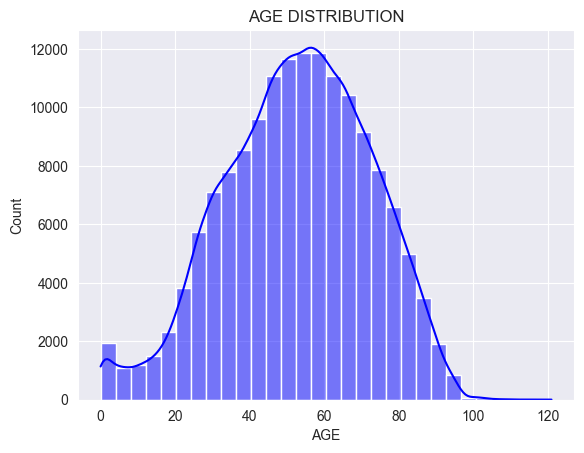

In [117]:
sns.histplot(df['AGE'], kde=True, color='b', bins=30)
plt.title('AGE DISTRIBUTION')

<Axes: xlabel='AGE', ylabel='Count'>

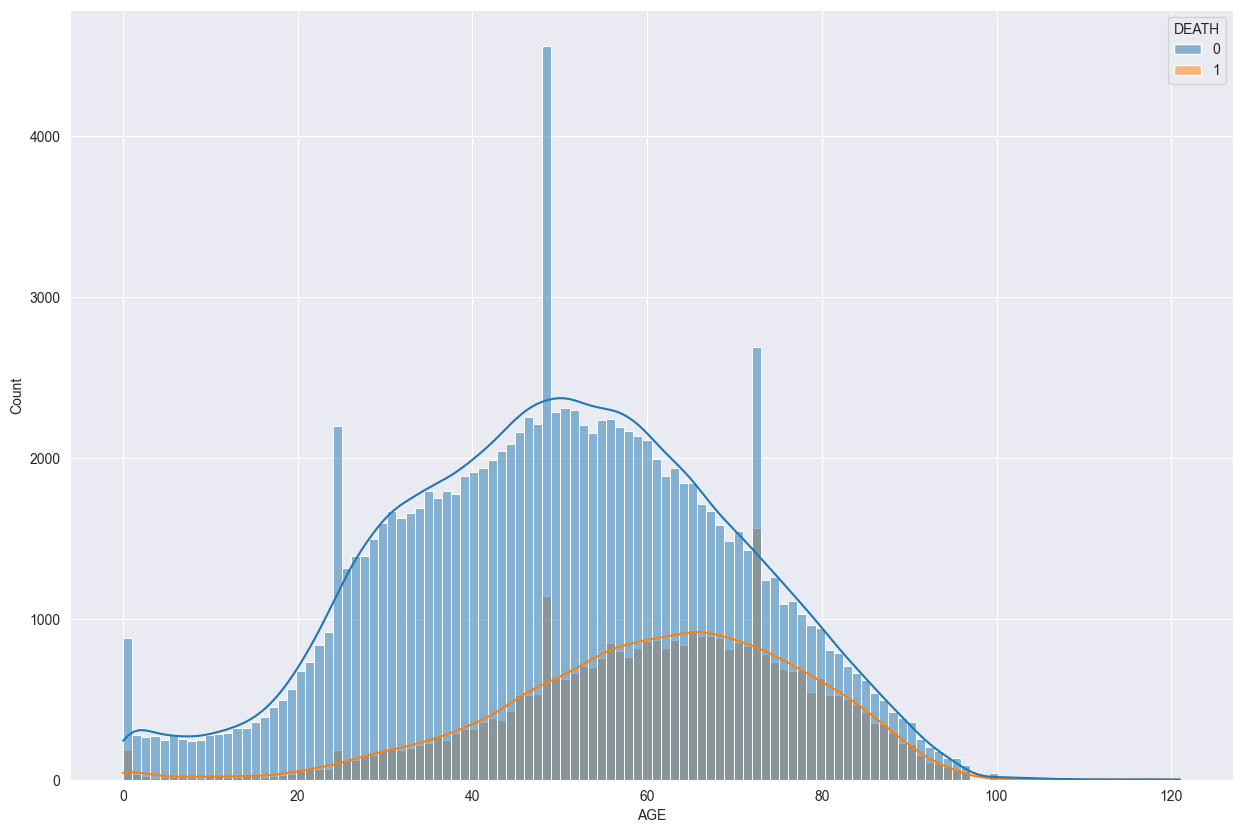

In [118]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'AGE', hue = 'DEATH', data = df , kde=True )

- Người cao tuổi có khả năng tử vong cao hơn người trẻ

In [119]:
df['DIABETES'].value_counts()

DIABETES
0.0    100452
1.0     53104
Name: count, dtype: int64

<Axes: xlabel='DIABETES', ylabel='count'>

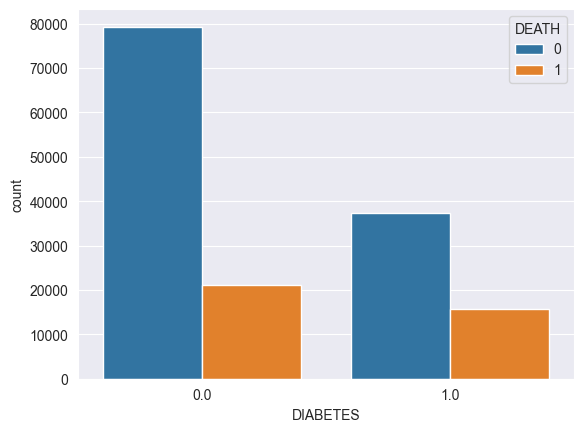

In [120]:
sns.countplot(data = df, x = "DIABETES", hue = "DEATH")

<Axes: xlabel='HIPERTENSION', ylabel='count'>

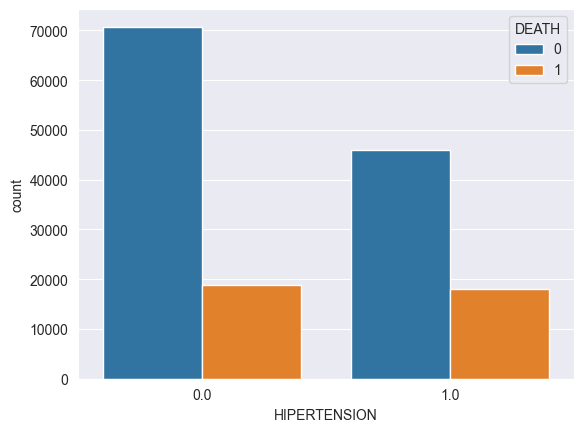

In [121]:
sns.countplot(data=df, x="HIPERTENSION", hue="DEATH")

- Số người nhiễm virus Corona mắc bệnh tăng huyết áp có khả năng tử vong cao hơn so với những người không mắc bệnh tăng huyết áp.

<Axes: xlabel='RENAL_CHRONIC', ylabel='count'>

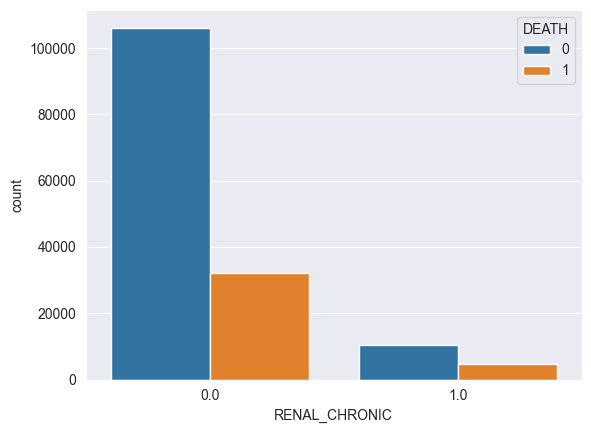

In [122]:
sns.countplot(data=df, x="RENAL_CHRONIC", hue="DEATH")

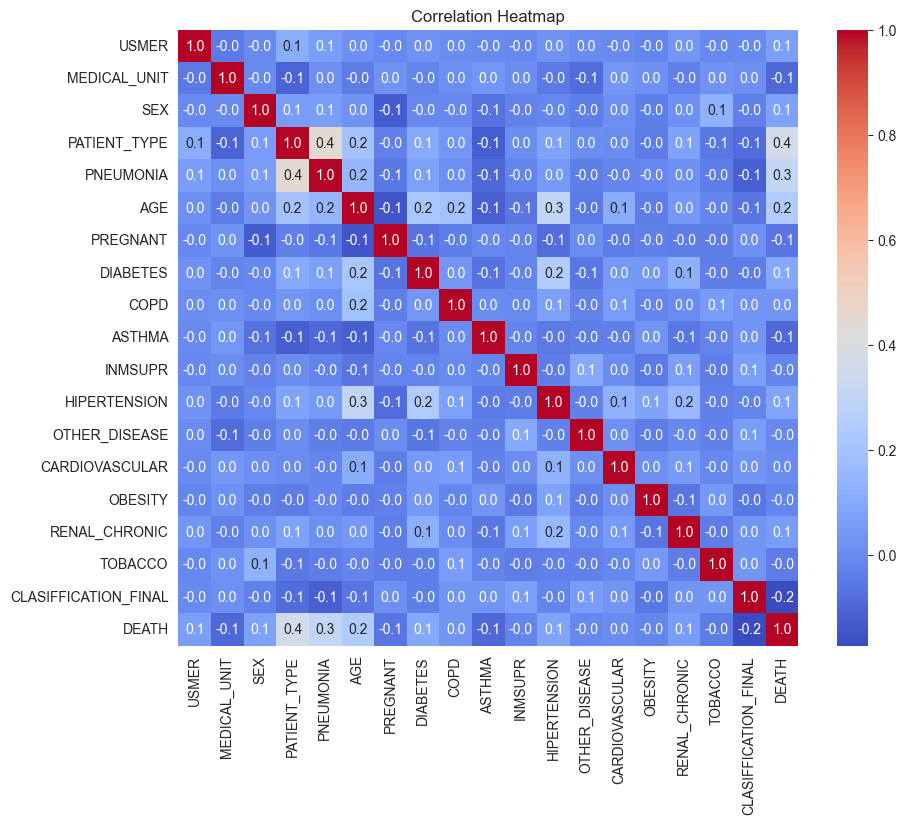

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

## Make data ready for modeling

In [124]:
x=df.drop('DEATH',axis=1)
y=df['DEATH']

Feature USMER: MI Score = 0.013796171098327425
Feature MEDICAL_UNIT: MI Score = 0.021753935855196582
Feature SEX: MI Score = 0.018523603794535992
Feature PATIENT_TYPE: MI Score = 0.0856691213995533
Feature PNEUMONIA: MI Score = 0.054700339819254484
Feature AGE: MI Score = 0.03553812718485494
Feature PREGNANT: MI Score = 0.0028066769642649536
Feature DIABETES: MI Score = 0.011464296486144443
Feature COPD: MI Score = 0.0
Feature ASTHMA: MI Score = 0.005350446615605353
Feature INMSUPR: MI Score = 0.0
Feature HIPERTENSION: MI Score = 0.013738333505998623
Feature OTHER_DISEASE: MI Score = 0.0006682844594469994
Feature CARDIOVASCULAR: MI Score = 0.001456841987922619
Feature OBESITY: MI Score = 0.007858660711677734
Feature RENAL_CHRONIC: MI Score = 0.0023615145703717033
Feature TOBACCO: MI Score = 0.002493016543973603
Feature CLASIFFICATION_FINAL: MI Score = 0.03517565195579264


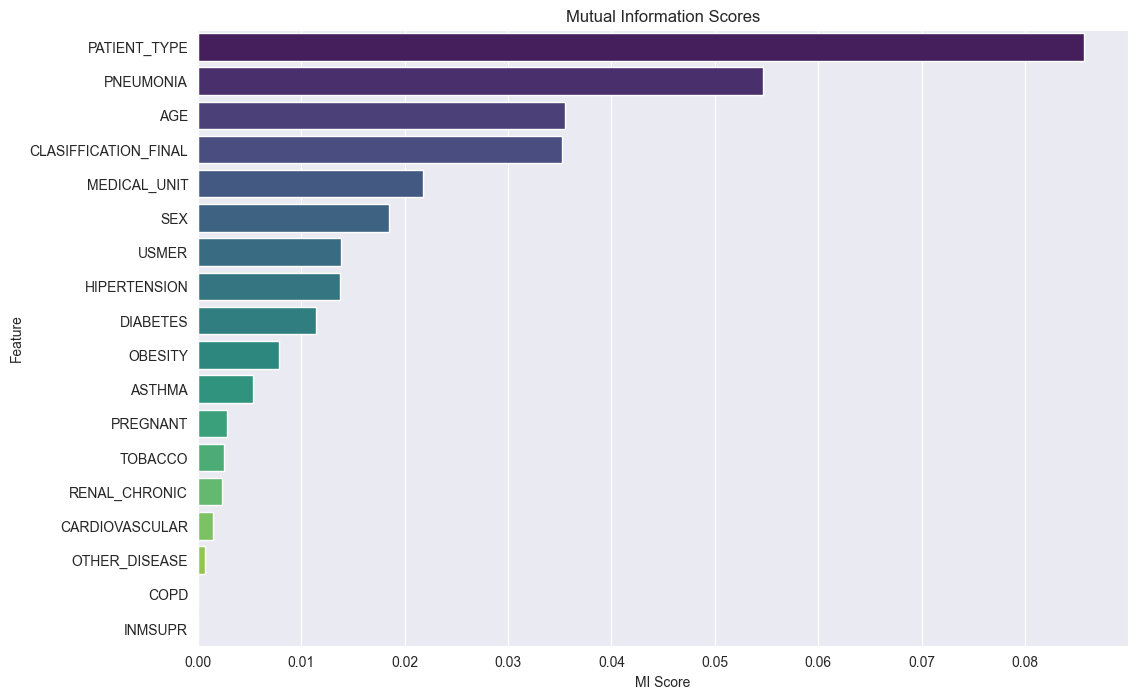

In [125]:
from sklearn.feature_selection import mutual_info_classif

# Tính toán MI scores
mi_scores = mutual_info_classif(x, y, random_state=42)

# Tạo DataFrame từ MI scores
feature_names = x.columns
for i, score in enumerate(mi_scores):
    print(f'Feature {feature_names[i]}: MI Score = {score}')
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'MI Score': mi_scores})

# Sắp xếp DataFrame theo MI Score giảm dần
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(x='MI Score', y='Feature', data=mi_scores_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.show()

- Loại bỏ những feature có MI score là 0

In [126]:
x.drop(columns=['COPD', 'INMSUPR'], inplace=True)

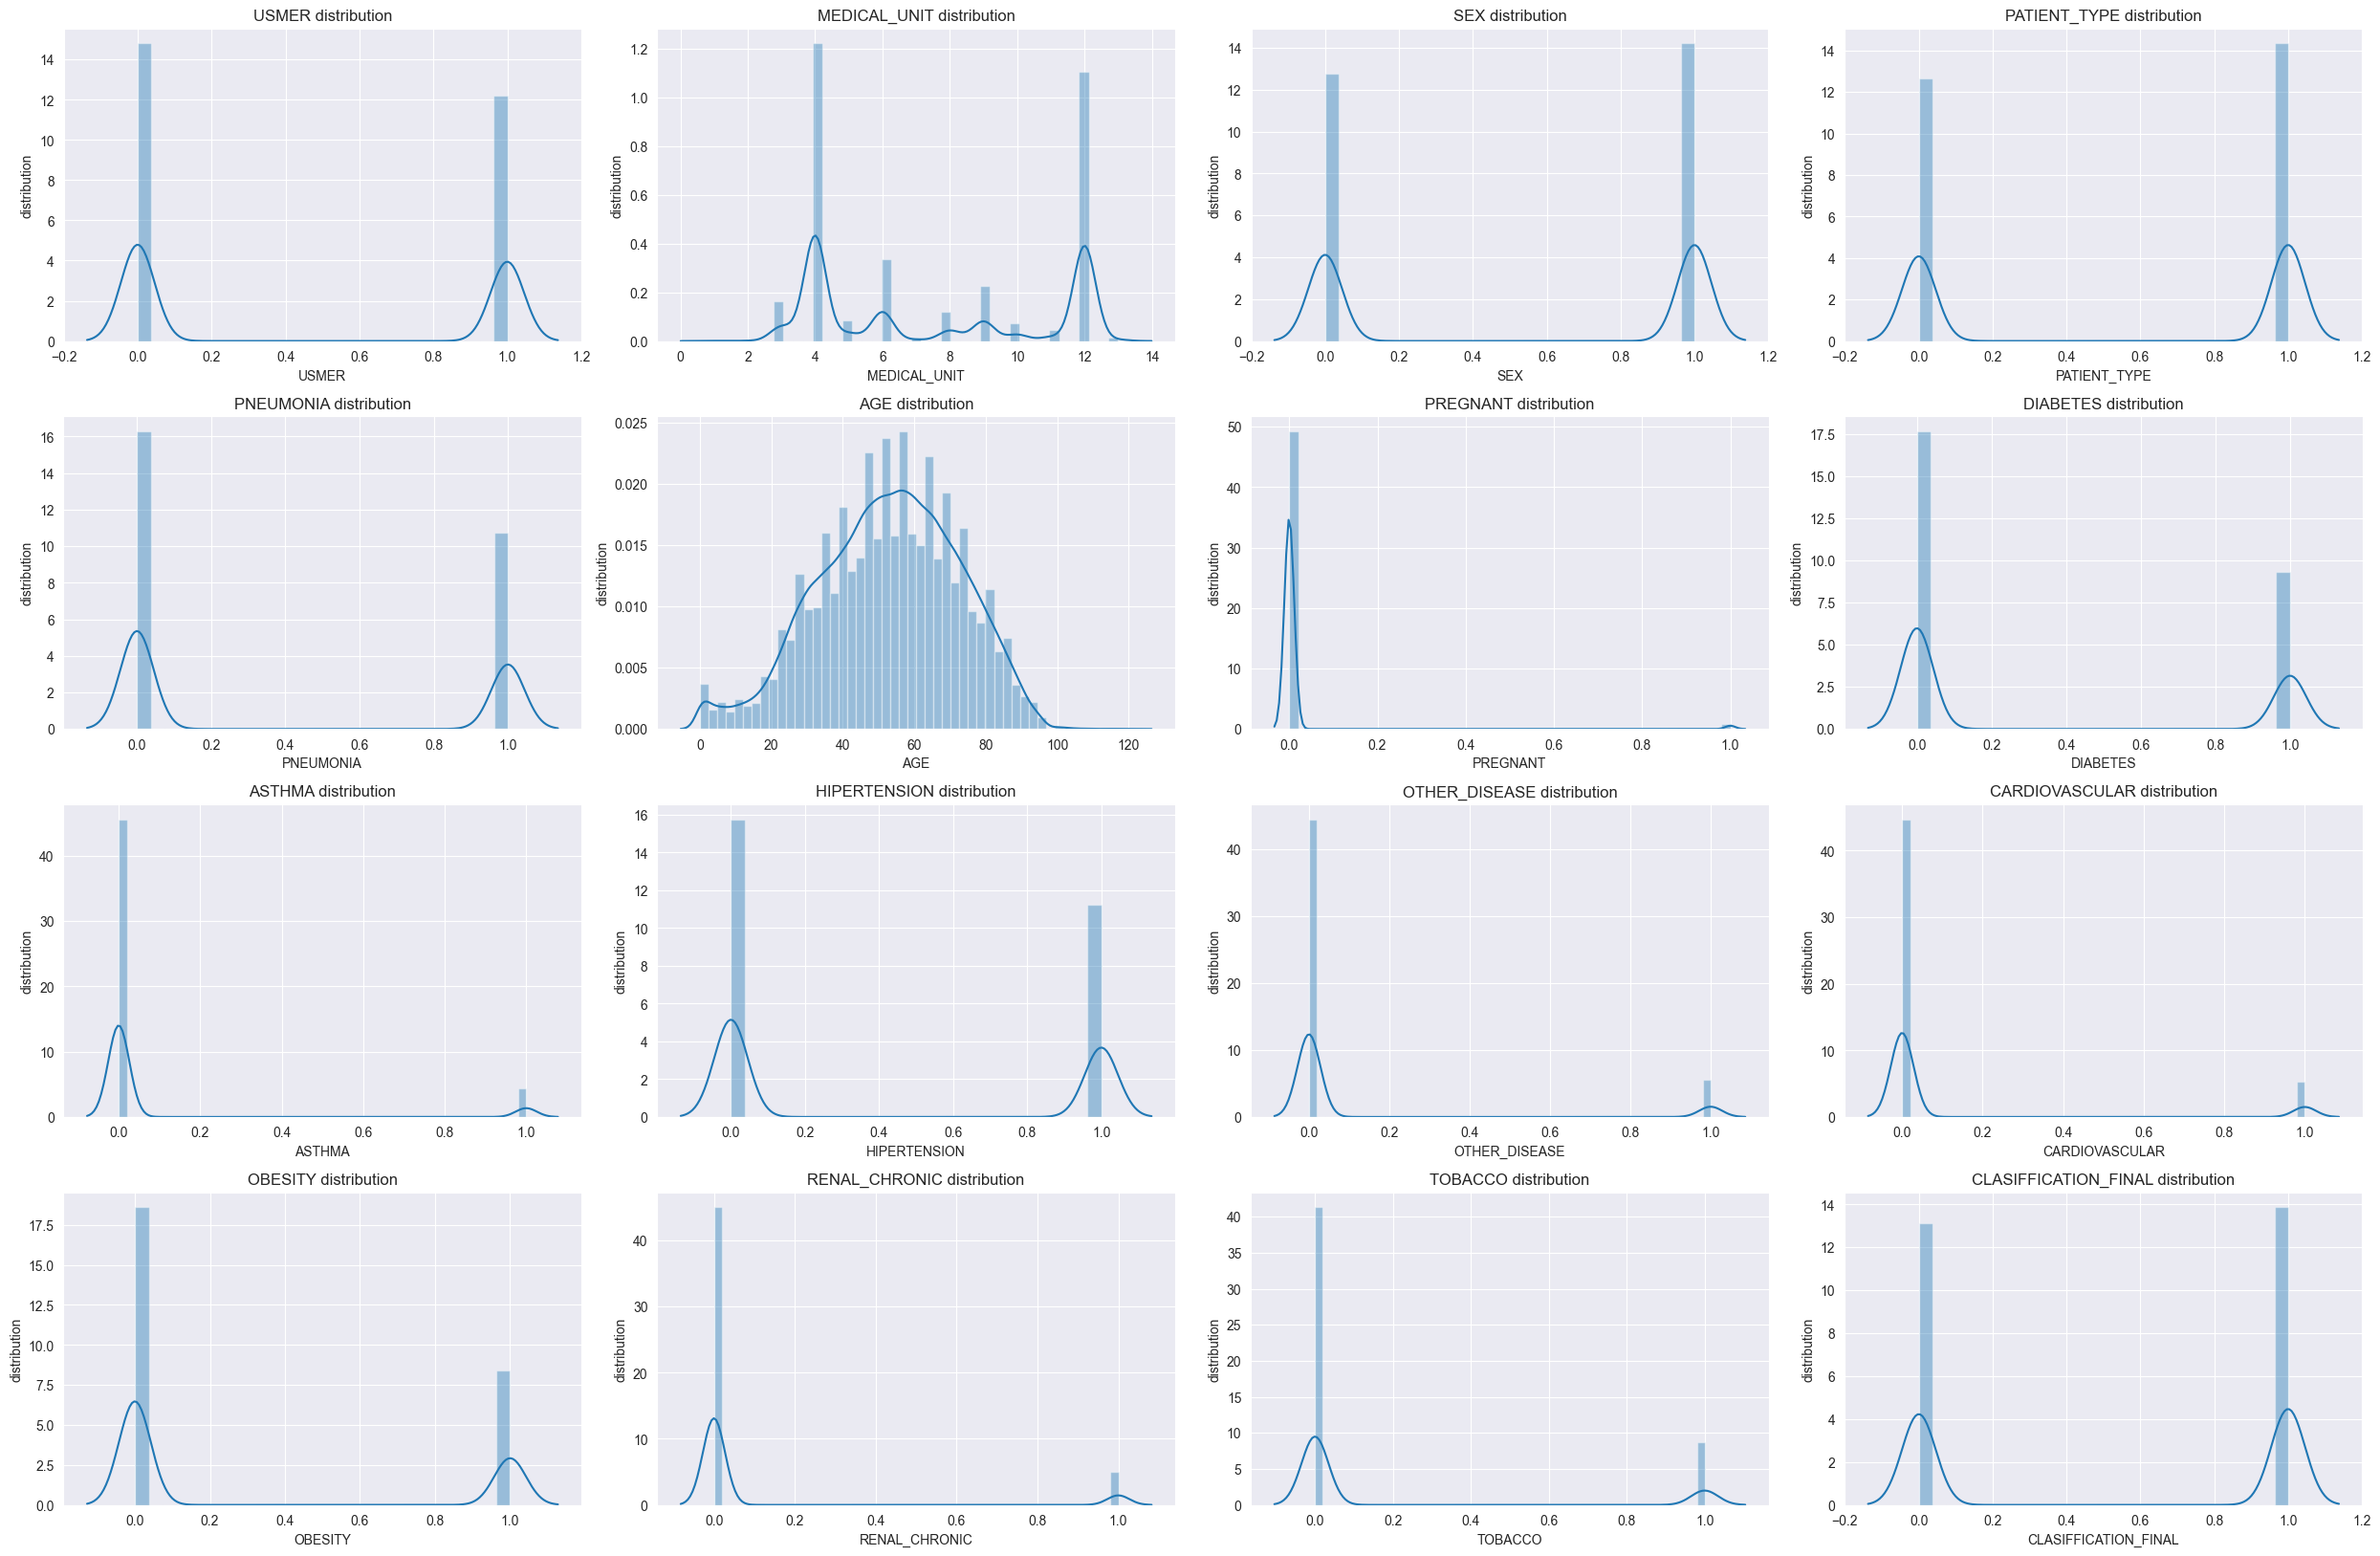

In [127]:
## Plotting the features 
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))
for index, feature in enumerate(x.columns):
    plt.subplot(5,4,index+1)
    sns.distplot(x[feature])
    plt.xlabel(f"{feature}")
    plt.ylabel("distribution")
    plt.title(f"{feature} distribution")
    
plt.tight_layout()

In [128]:
from sklearn.model_selection import train_test_split

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [130]:
x_train.shape

(122844, 16)

In [131]:
y_train.value_counts()

DEATH
0    93184
1    29660
Name: count, dtype: int64

In [132]:
y_test.value_counts()

DEATH
0    23430
1     7282
Name: count, dtype: int64

- Chuẩn hóa dữ liệu

In [137]:
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Modeling

In [142]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score , precision_score , recall_score , f1_score
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Train Accuracy:', model.score(x_train, y_train))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Confusion Matrix:', '\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:', '\n', classification_report(y_test, y_pred))

## Baseline Model: Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_evaluation(dt)

Train Accuracy: 0.9015255120315196
Accuracy: 0.670552227142485
Precision: 0.28076685219542363
Recall: 0.24938203790167537
F1 Score: 0.26414545454545457
Confusion Matrix: 
 [[18778  4652]
 [ 5466  1816]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79     23430
           1       0.28      0.25      0.26      7282

    accuracy                           0.67     30712
   macro avg       0.53      0.53      0.53     30712
weighted avg       0.66      0.67      0.66     30712



## KNN

In [ ]:
# PCA
from sklearn.decomposition import PCA

# Khởi tạo PCA và chọn số lượng thành phần chính
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Danh sách các tham số cần tìm kiếm
param_grid = {
    'n_neighbors': np.arange(2, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Khởi tạo GridSearchCV với mô hình KNN và danh sách tham số
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu
grid_search.fit(X_train_pca, y_train)

# In ra tham số tốt nhất
print("Best parameters:", grid_search.best_params_)

# In ra điểm số tốt nhất
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best score: 0.7666227090103392


In [ ]:
best_knn = grid_search.best_estimator_
model_evaluation(best_knn)

Train Accuracy: 0.7922812672983621
Accuracy: 0.7682339150820526
Precision: 0.52145473574045
Recall: 0.2736885471024444
F1 Score: 0.3589697406340058
Confusion Matrix: 
 [[21601  1829]
 [ 5289  1993]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     23430
           1       0.52      0.27      0.36      7282

    accuracy                           0.77     30712
   macro avg       0.66      0.60      0.61     30712
weighted avg       0.74      0.77      0.74     30712



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
model_evaluation(lr)

Train Accuracy: 0.778190225000814
Accuracy: 0.7776113571242511
Precision: 0.5491946016543318
Recall: 0.34647074979401266
F1 Score: 0.42489053553384987
Confusion Matrix: 
 [[21359  2071]
 [ 4759  2523]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     23430
           1       0.55      0.35      0.42      7282

    accuracy                           0.78     30712
   macro avg       0.68      0.63      0.64     30712
weighted avg       0.75      0.78      0.76     30712



## Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
model_evaluation(nb)

Train Accuracy: 0.6985119338347823
Accuracy: 0.6985543110184944
Precision: 0.42623562789308644
Recall: 0.783987915407855
F1 Score: 0.5522344747533372
Confusion Matrix: 
 [[15745  7685]
 [ 1573  5709]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77     23430
           1       0.43      0.78      0.55      7282

    accuracy                           0.70     30712
   macro avg       0.67      0.73      0.66     30712
weighted avg       0.79      0.70      0.72     30712



## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, oob_score=True, random_state=0)
model_evaluation(bag_model)

Train Accuracy: 0.9015010908143661
Accuracy: 0.6905769731700964
Precision: 0.3328315520096342
Recall: 0.30362537764350456
F1 Score: 0.31755834829443447
Confusion Matrix: 
 [[18998  4432]
 [ 5071  2211]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     23430
           1       0.33      0.30      0.32      7282

    accuracy                           0.69     30712
   macro avg       0.56      0.56      0.56     30712
weighted avg       0.68      0.69      0.69     30712



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
model_evaluation(rf)

Train Accuracy: 0.8981716648757774
Accuracy: 0.677845793175306
Precision: 0.3299036207345663
Recall: 0.3478439989014007
F1 Score: 0.3386363636363636
Confusion Matrix: 
 [[18285  5145]
 [ 4749  2533]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     23430
           1       0.33      0.35      0.34      7282

    accuracy                           0.68     30712
   macro avg       0.56      0.56      0.56     30712
weighted avg       0.68      0.68      0.68     30712



## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
model_evaluation(xgb)

Train Accuracy: 0.7957409397284361
Accuracy: 0.7843839541547278
Precision: 0.5683512841756421
Recall: 0.3768195550672892
F1 Score: 0.45317919075144514
Confusion Matrix: 
 [[21346  2084]
 [ 4538  2744]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.87     23430
           1       0.57      0.38      0.45      7282

    accuracy                           0.78     30712
   macro avg       0.70      0.64      0.66     30712
weighted avg       0.76      0.78      0.77     30712



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
model_evaluation(gb)                                                                        

Train Accuracy: 0.7869167399303181
Accuracy: 0.7865003907267517
Precision: 0.5820692777903554
Recall: 0.3530623455094754
F1 Score: 0.43952474570476113
Confusion Matrix: 
 [[21584  1846]
 [ 4711  2571]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     23430
           1       0.58      0.35      0.44      7282

    accuracy                           0.79     30712
   macro avg       0.70      0.64      0.65     30712
weighted avg       0.76      0.79      0.77     30712



## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab = AdaBoostClassifier()
model_evaluation(ab)

Train Accuracy: 0.7797450424929179
Accuracy: 0.7801185204480333
Precision: 0.5536620004057619
Recall: 0.3747596814062071
F1 Score: 0.4469740398001802
Confusion Matrix: 
 [[21230  2200]
 [ 4553  2729]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     23430
           1       0.55      0.37      0.45      7282

    accuracy                           0.78     30712
   macro avg       0.69      0.64      0.65     30712
weighted avg       0.76      0.78      0.76     30712

